# H&E image generation

In [1]:
import spotscope as ss
import scanpy as sc
import matplotlib.pyplot as plt
import torch

/nas/ljc/download/miniconda3/envs/spotscope/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("example_data/MOB_celltype/mouse_bolb_12.h5ad")

In [3]:
ss.load_reference_datasets(adata, dataset_paths=[
    "example_data/MOB_celltype/mouse_bolb_1.h5ad",
    "example_data/MOB_celltype/mouse_bolb_2.h5ad",
    "example_data/MOB_celltype/mouse_bolb_3.h5ad",
    "example_data/MOB_celltype/mouse_bolb_4.h5ad",
    "example_data/MOB_celltype/mouse_bolb_5.h5ad",
    "example_data/MOB_celltype/mouse_bolb_6.h5ad",
    "example_data/MOB_celltype/mouse_bolb_7.h5ad",
    "example_data/MOB_celltype/mouse_bolb_8.h5ad",
]
)

Building reference loaders
Finished building reference loaders


In [4]:
ss.load_model(adata, 
              model_path='ckpt/mob_celltype.pt',
              model=ss.CLIPModel(image_embedding=1024,
                                 spot_embedding=4,
                                 projection_dim=128))

/nas/ljc/Spotscope/spotscope/utils.py:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


Finished loading model


## Customize the annotations

In [5]:
proportions = torch.eye(4)
proportions = torch.concat([proportions, torch.tensor([[0,0,0,0,]])])
print("Cell type proportions:")
print(proportions)


Cell type proportions:
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])


## Generation and plotting

/nas/ljc/Spotscope/spotscope/functions.py:299: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pesudo_annotation = torch.tensor(pesudo_annotation).float()


Getting image embeddings...


100%|██████████| 64/64 [00:02<00:00, 25.73it/s]


dot_similarity shape: torch.Size([5, 2046])
Fusioning patches...


100%|██████████| 5/5 [00:01<00:00,  4.26it/s]


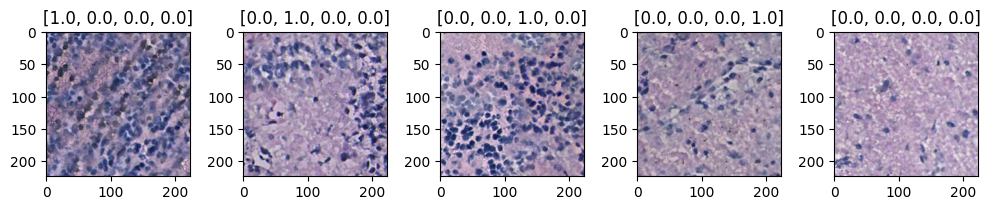

In [6]:
generated_images = ss.image_generation(
    adata,
    proportions,
    topk=10
)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    axes[i].imshow(generated_images[i])
    axes[i].set_title(f"{list(proportions[i,:].numpy())}")
plt.tight_layout()
plt.show()